---
# PCA: Example for Data Visualization

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = [iris.target_names[i] for i in iris.target]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Standardize the Data

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x = StandardScaler().fit_transform(x)

### PCA Projection to 2D

In [13]:
pca = PCA(n_components=4)
x_pca = pca.fit_transform(x)

In [ ]:
x_pca_df = pd.DataFrame(x_pca, columns=["PC1", "PC2"])

In [7]:
finalDf = pd.concat([x_pca_df, df[['target']]], axis=1)
finalDf.head(5)

,PC1,PC2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


### Visualize 2D Projection

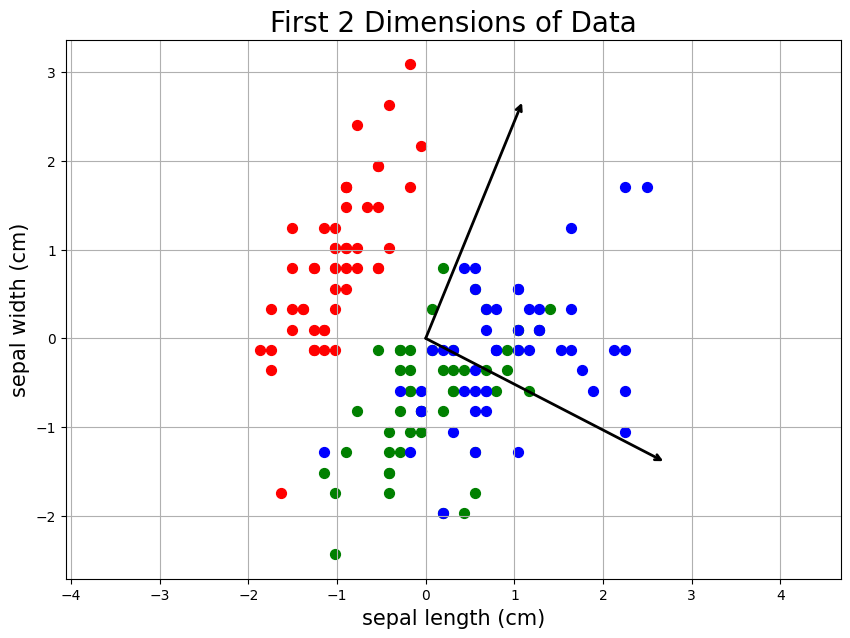

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="black")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(
        x[indicesToKeep, 0],
        x[indicesToKeep, 1],
        c=color, s=50
    )

for length, vector in zip(pca.explained_variance_[:2], pca.components_[:2]):
    v = vector[:2] * 3 * np.sqrt(length)
    draw_vector(pca.mean_[:2], pca.mean_[:2] + v)

plt.title('First 2 Dimensions of Data', fontsize = 20)
plt.xlabel(f'{df.columns[0]}', fontsize = 15)
plt.ylabel(f'{df.columns[1]}', fontsize = 15)
plt.axis('equal')
plt.grid()

(-3.0785967172703943, 3.614947598276952, -2.921090683718923, 2.95330235029295)

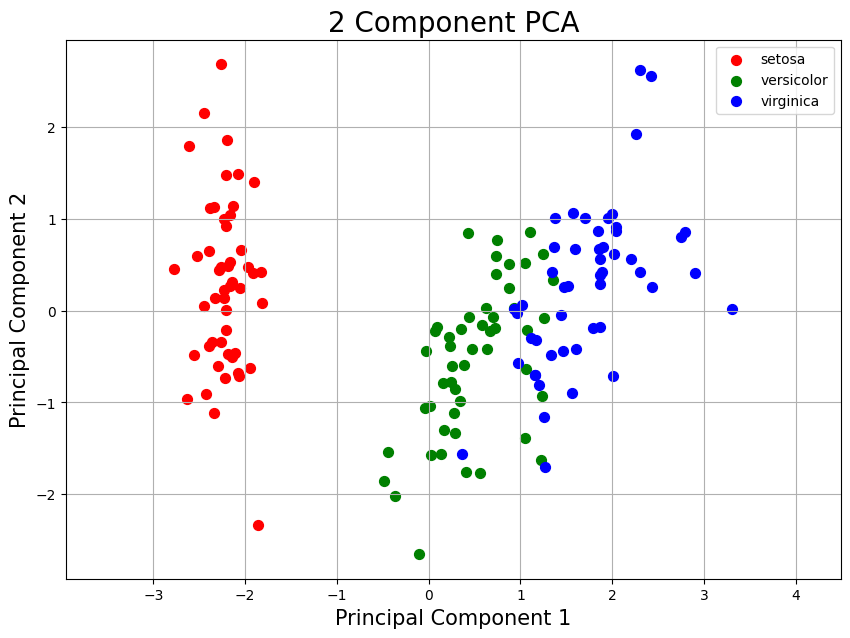

In [9]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(
        finalDf.loc[indicesToKeep, 'PC1'],
        finalDf.loc[indicesToKeep, 'PC2'],
        c=color, s=50
    )
ax.legend(targets)
ax.grid()
plt.axis("equal")

### Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [14]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [15]:
pca.explained_variance_ratio_.sum()

1.0

---
# PCA: Example for Feature Engineering


---
## 1. Manual

The issue of dimensionality reduction can be thought of as a part of `preprocessing`, that is, the attributes to be introduced into a model later are improved. Also, it is useful in an `exploratory stage`, since reducing the number of attributes (typically to two) makes it easier to visualize a dataset.


Below is an example of a problem where we manually select a combination of attributes that improves the performance of a model.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

In [17]:
data = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/data_PCA.csv', index_col=0)
data.head()

,x1,x2,y
0,3.204922,2.204922,-1.000000
1,-2.124616,-3.116584,-0.991968
2,1.380153,0.396217,-0.983936
3,1.988312,1.012408,-0.975904
4,3.044791,2.076919,-0.967871


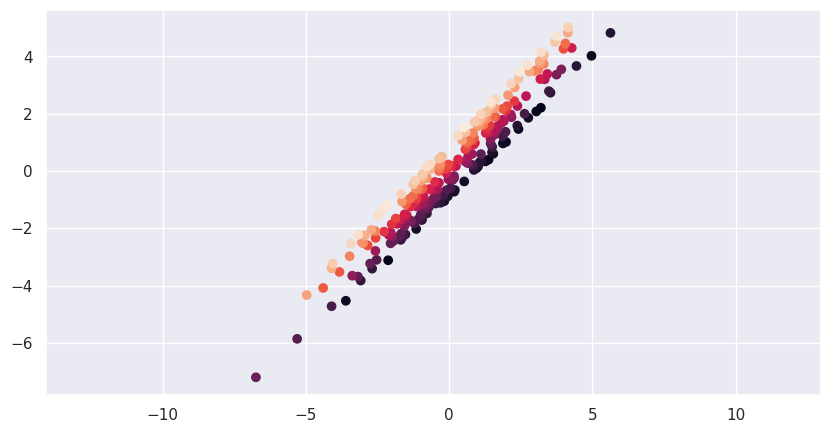

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(data['x1'], data['x2'], c=data['y'])
plt.axis("equal")
plt.show()

Note that the labels grow in a "45 degree" direction relative to the attributes. If we explore the mapping between them and the (`y`) tags, we notice that neither is mapped to this value.

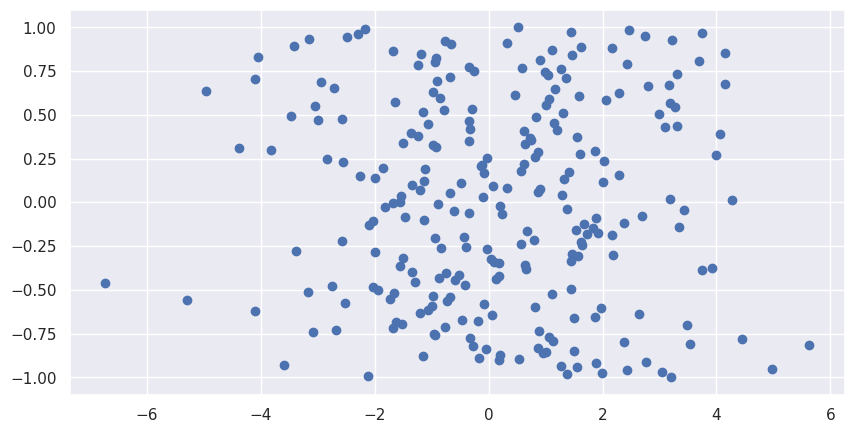

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(data['x1'], data['y'])
plt.show()

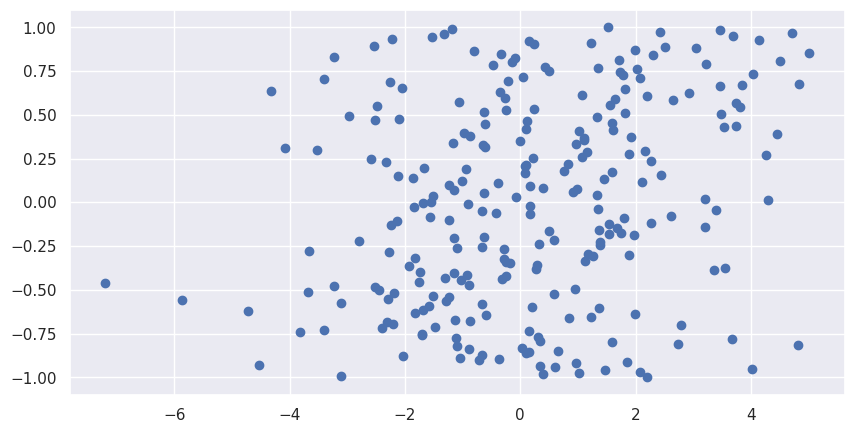

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(data['x2'], data['y'])
plt.show()

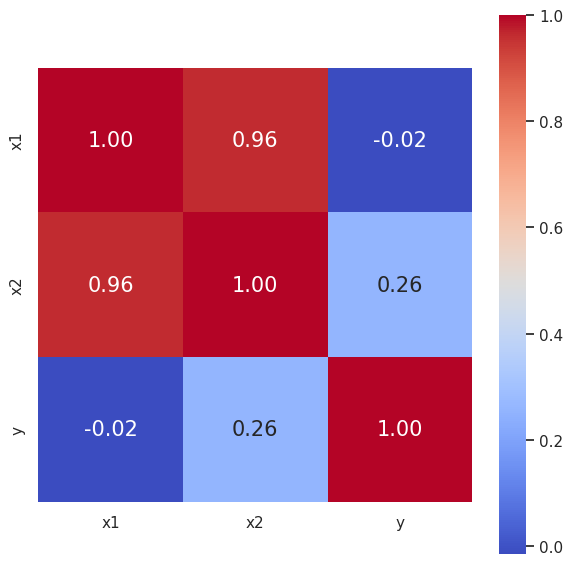

In [22]:
corr = data.corr(method='pearson')

plt.figure(figsize=(7, 7))
sns.heatmap(
    corr, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 15},
    xticklabels=data.columns,
    yticklabels=data.columns,
    cmap='coolwarm'
)

plt.show()

Note that the features are highly correlated with each other and poorly correlated with the `y` tag that we want to predict. This could lead us to believe that this dataset is of poor quality, that `x1`, `x2` are not related to `y`.

We are going to train a decision tree to predict the value of `y`.

In [23]:
X = data[['x1', 'x2']].values
y = data['y'].values

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
regresor = DecisionTreeRegressor(max_depth=2)
regresor.fit(X_train,y_train);

In [27]:
y_train_pred = regresor.predict(X_train)
y_test_pred = regresor.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

0.2692180499083255
0.28699492277686467


<Axes: >

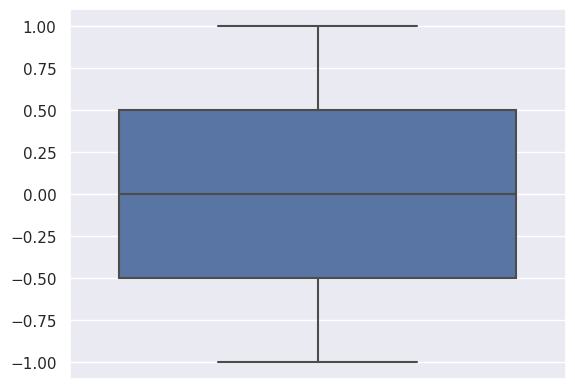

In [29]:
sns.boxplot(y=y)

Note that the model is not very good. However, the information to be able to predict is in the data. The problem comes because we did not perform a proper data transformation before feeding the model.

Let's add a new attribute: `the subtraction of x2 and x1`.

In [30]:
data['x_new'] = data['x2'] - data['x1']
X_new = data['x_new'].values

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [32]:
regresor = DecisionTreeRegressor(max_depth=1)
regresor.fit(X_train.reshape(-1,1), y_train);

In [33]:
y_train_pred = regresor.predict(X_train.reshape(-1,1))
y_test_pred = regresor.predict(X_test.reshape(-1,1))

In [34]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

0.0805587181170301
0.09314442905377453


Prediction improved a lot! What happened? Let's first look at the relationship between the new attribute and the `y` tag.

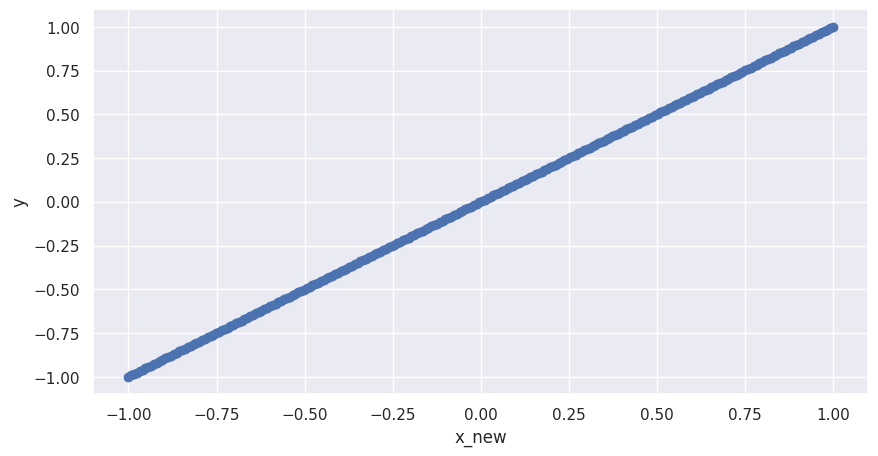

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(data['x_new'], data['y'])
plt.xlabel('x_new')
plt.ylabel('y');

Now the new attribute maintains a perfect linear relationship with `y`.

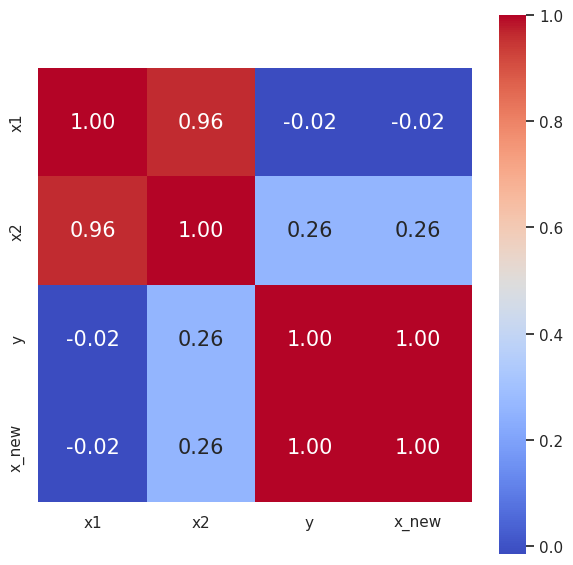

In [36]:
corr = data.corr(method='pearson')
plt.figure(figsize=(7, 7))
sns.heatmap(
    corr, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 15},
    xticklabels=data.columns,
    yticklabels=data.columns,
    cmap='coolwarm'
)

plt.show()

And we also see that it is perfectly correlated with the tag, but not with `x1` and `x2`.

---
## 2. Automatic: 2 Features

PCA can help us to automatically prepare the attributes, so it will not be necessary to do "by hand" what we did in the previous section. It is **very important** that you look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [37]:
data = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/data_PCA.csv', index_col=0)
data.head()

,x1,x2,y
0,3.204922,2.204922,-1.000000
1,-2.124616,-3.116584,-0.991968
2,1.380153,0.396217,-0.983936
3,1.988312,1.012408,-0.975904
4,3.044791,2.076919,-0.967871


In [38]:
X = data[['x1', 'x2']].values
y = data['y'].values

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

How are the new attributes compared to the original ones? We can see this through the `components_` attribute of the `PCA` class.

In [40]:
pd.DataFrame(
    data = pca.components_,
    columns = data[['x1', 'x2']].columns,
    index = ['PC1', 'PC2']
)

,x1,x2
PC1,-0.694567,-0.719428
PC2,0.719428,-0.694567


---
$PC_1=-0.694567 x_1 -0.719428 x_2$
---
$PC_2=0.719428 x_1 -0.694567 x_2$
---

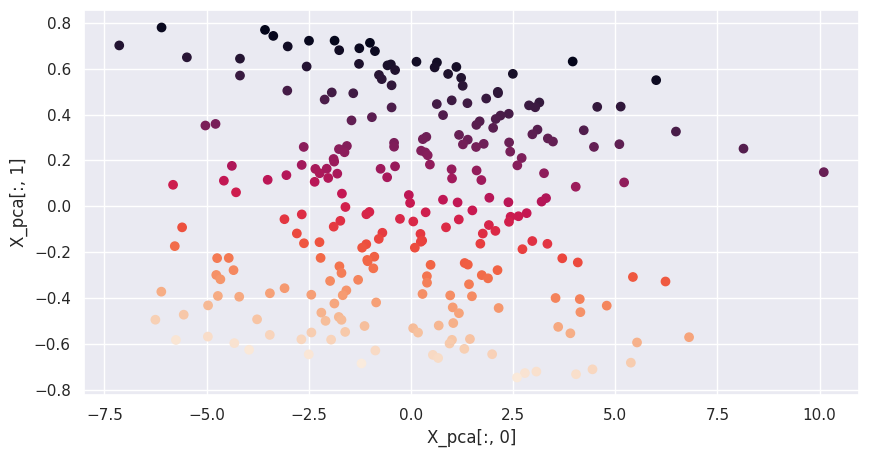

In [41]:
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('X_pca[:, 0]')
plt.ylabel('X_pca[:, 1]');

Notice that there is now an attribute that is highly correlated with the label (can you figure out which one it is? If necessary, make another scatterplot, testing each new attribute against `y`). We now use these two attributes as a dataset and try again to train a model.

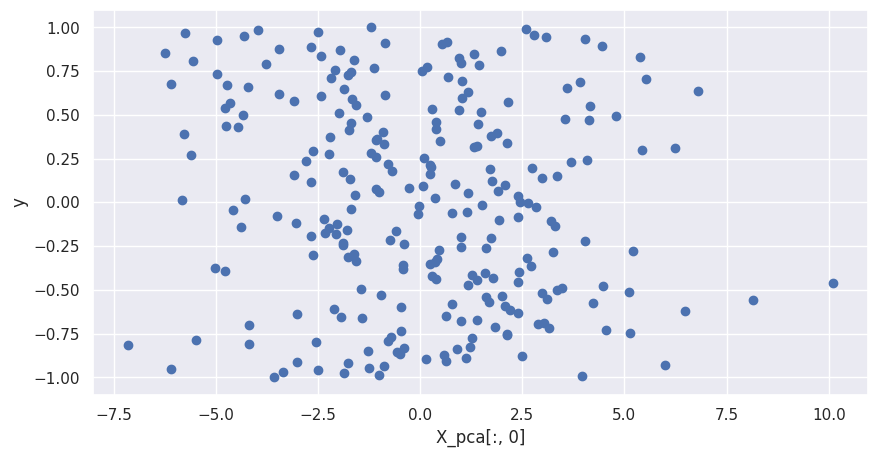

In [42]:
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], y)
plt.xlabel('X_pca[:, 0]')
plt.ylabel('y');

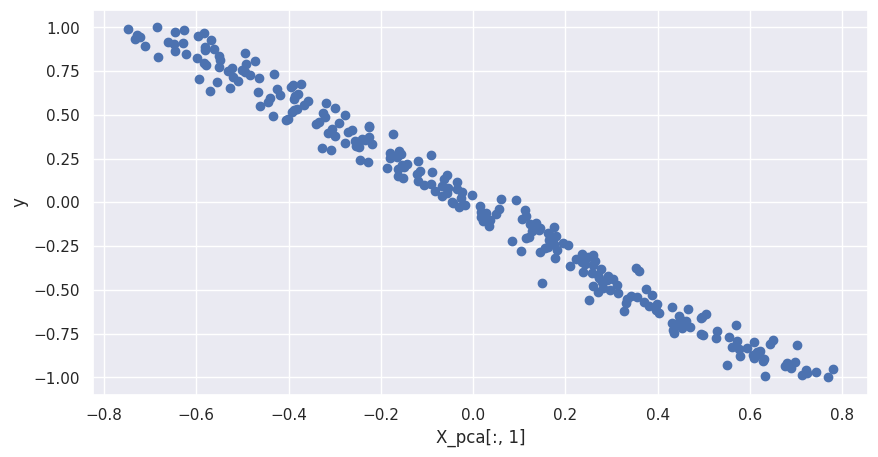

In [43]:
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 1], y)
plt.xlabel('X_pca[:, 1]')
plt.ylabel('y');

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=42)

In [45]:
regresor2 = DecisionTreeRegressor(max_depth=1)
regresor2.fit(X_train, y_train);

Note that the error we get using these two new features (obtained through PCA) is much lower than the error we would have had if we used the original features.

In [46]:
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

0.0805587181170301
0.09314442905377453


Finally, we can see which attribute was most important when predicting.

In [47]:
regresor2.feature_importances_

array([0., 1.])

In [48]:
pca.explained_variance_ratio_

array([0.98133634, 0.01866366])

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/data_PCA.csv', index_col=0)
data.head()

In [ ]:
X = data[['x1', 'x2']].values
y = data['y'].values

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

In [ ]:
pd.DataFrame(
    data = pca.components_,
    columns = data[['x1', 'x2']].columns,
    index = ['PC1']
)

---
$PC_1=-0.694567 x_1 -0.719428 x_2$
---


---
Remember:

$PC_1=-0.694567 x_1 -0.719428 x_2$
---
$PC_2=0.719428 x_1 -0.694567 x_2$
---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=42)

In [ ]:
regresor2 = DecisionTreeRegressor(max_depth=1)
regresor2.fit(X_train, y_train);